In [ ]:
using Plots

In [46]:
f(x) = log(sqrt(x)-sqrt(x+1)) # sqrt(x)*
# f(x) = sqrt(x)*log(sqrt(x)-sqrt(x+1))

f (generic function with 1 method)

In [47]:
f(1.1+1e-3im), f(1.1-1e-3im)

(-0.9154691173944586 + 3.141263677797491im, -0.9154691173944586 - 3.141263677797491im)

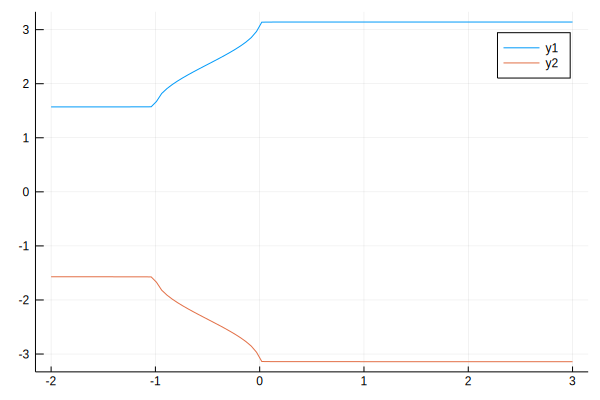

In [48]:
plot(x->imag(f(x +1e-3im)), LinRange(-2,3,100))
plot!(x->imag(f(x-1e-3im)), LinRange(-2,3,100))

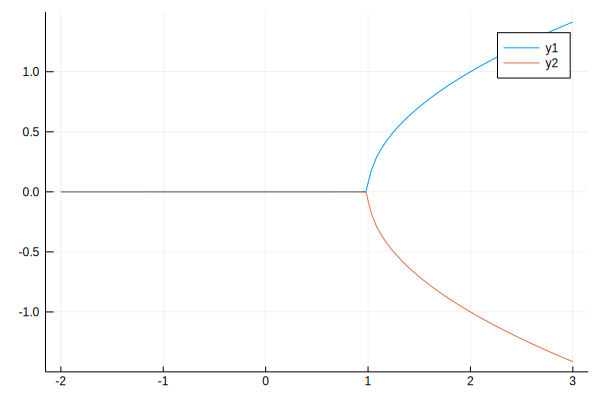

In [50]:
plot(x->imag(sqrt(1-x +1e-3im)), LinRange(-2,3,100))
plot!(x->imag(sqrt(1-x-1e-3im)), LinRange(-2,3,100))

In [85]:
function ChewMandestam(s,m1sq,m2sq)
    m1, m2 = sqrt(m1sq), sqrt(m2sq)
    #
    sth,spth = (m1+m2)^2, (m1-m2)^2;
    λh = sqrt(s-spth)*sqrt(s-sth)
    #
#     val = (m1sq+m2sq-s+λh)
    val = 1/(π) * (
        λh/s*log((m1sq+m2sq-s+λh)/(2*m1*m2))+
            (m1sq-m2sq)/(sqrt(m1sq)+sqrt(m2sq))^2*log(m1/m2) -
            (m1sq-m2sq)/s*log(m1/m2)
    )
    return val
end

ChewMandestam (generic function with 1 method)

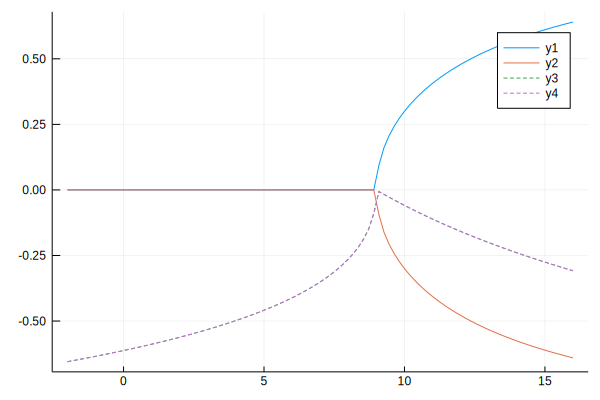

In [90]:
let m1 = 2, m2 = 1
    plot(x->imag(ChewMandestam(x +1e-3im,m1^2,m2^2)), LinRange(-2,16,100))
    plot!(x->imag(ChewMandestam(x-1e-3im,m1^2,m2^2)), LinRange(-2,16,100))
    plot!(x->real(ChewMandestam(x +1e-3im,m1^2,m2^2)), LinRange(-2,16,100), ls=:dash)
    plot!(x->real(ChewMandestam(x-1e-3im,m1^2,m2^2)), LinRange(-2,16,100), ls=:dash)
end

In [53]:
let m1 = 1, m2 = 2
    ChewMandestam((m1+m2)^2+1e-9im,m1^2,m2^2)
end

-0.024136113263944138 + 7.0272211257633e-6im

In [37]:
ChewMandestam(-1+1e-3im,1,4), ChewMandestam(-1-1e-3im,1,4)

(-0.6587112964257376 + 2.119273951821328e-5im, -0.6587112964257376 - 2.119273951821328e-5im)

In [56]:
let f(x) = sqrt(x)-sqrt(x+1)
    f(0.1+1e-3im), f(0.1-1e-3im)
end

(-0.732577237777752 + 0.0011043878213397348im, -0.732577237777752 - 0.0011043878213397348im)

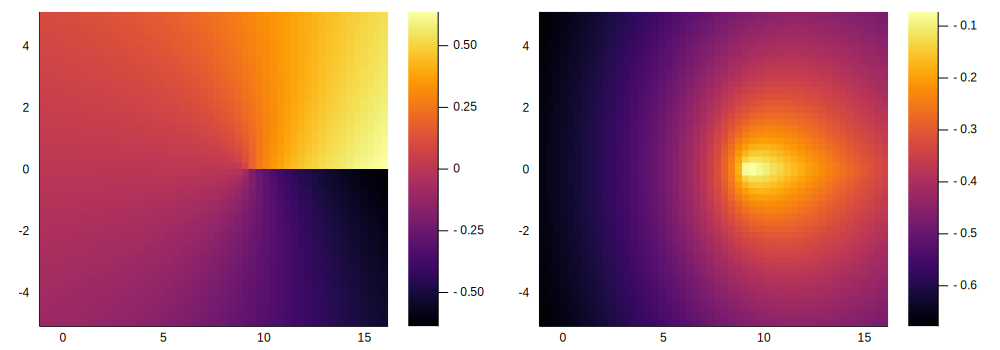

In [71]:
let m1 = 1, m2 = 2
    xv = LinRange(-1,16,50)
    yv = LinRange(-5,5,50)
    calv = ChewMandestam.(xv' .+ 1im .* yv, m1^1, m2^2)
    plot(layout=grid(1,2), size=(1000,350),
        heatmap(xv, yv, imag.(calv)),
        heatmap(xv, yv, real.(calv))
        )
#     xv' .+ 1im .* yv
end

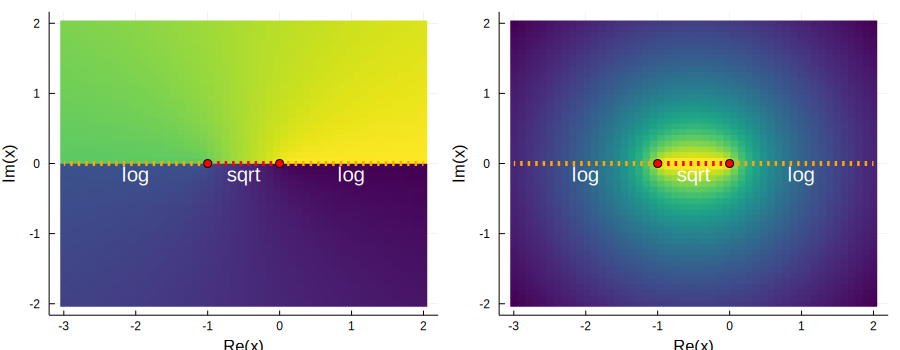

In [135]:
let
    f(x) = log(sqrt(x)-sqrt(x+1))
    xv = LinRange(-3,2,50)
    yv = LinRange(-2,2,50)
    calv = f.(xv' .+ 1im .* yv)
    #
    # plot Re[f] and Im[f]
    plot(layout=grid(1,2), size=(900,350))
    heatmap!(xv, yv, imag.(calv), colorbar=false, sp=1, c=:viridis)
    heatmap!(xv, yv, real.(calv), colorbar=false, sp=2, c=:viridis)
    #
    # sqrt and log cuts
    [plot!([0.0im, -1.0], l=(:red,:dot,5), sp=i, lab="", ann=(-0.5,0,text("sqrt",:white,:top))) for i=1:2]
    [plot!([-1+0.0im, -3.0], l=(:orange,:dot,5), sp=i, lab="", ann=(1,0,text("log",:top,:white))) for i=1:2]
    [plot!([0.0im, 2.0], l=(:orange,:dot,5), sp=i, lab="", ann=(-2,0,text("log",:top,:white))) for i=1:2]
    [scatter!([0.0im, -1.0], m=(:red,4), sp=i, lab="") for i=1:2]
    plot!()
end